In [47]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import glob
# matplotlib.use('Agg')

In [48]:
# noise_files = glob.glob('..\\噪音数据\\2024.1.4_留仙大道噪声测试\\**\\*.csv', recursive=True)
noise_files = glob.glob('../噪音数据/2024.1.4_留仙大道噪声测试/**/*.csv', recursive=True)

noise_files

['../噪音数据/2024.1.4_留仙大道噪声测试/测试1/测试1.csv',
 '../噪音数据/2024.1.4_留仙大道噪声测试/测试2/测试2.csv',
 '../噪音数据/2024.1.4_留仙大道噪声测试/测试3/测试3.csv',
 '../噪音数据/2024.1.4_留仙大道噪声测试/测试4/测试4.csv',
 '../噪音数据/2024.1.4_留仙大道噪声测试/测试5/测试5.csv']

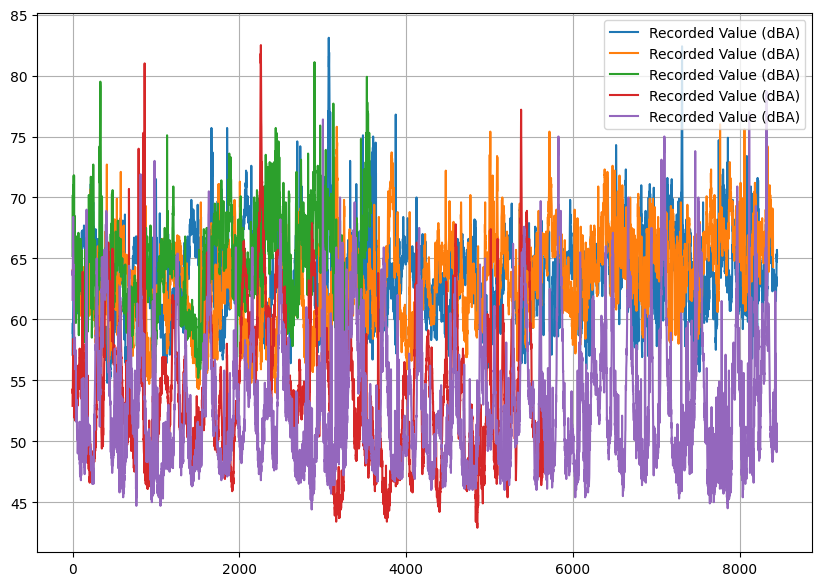

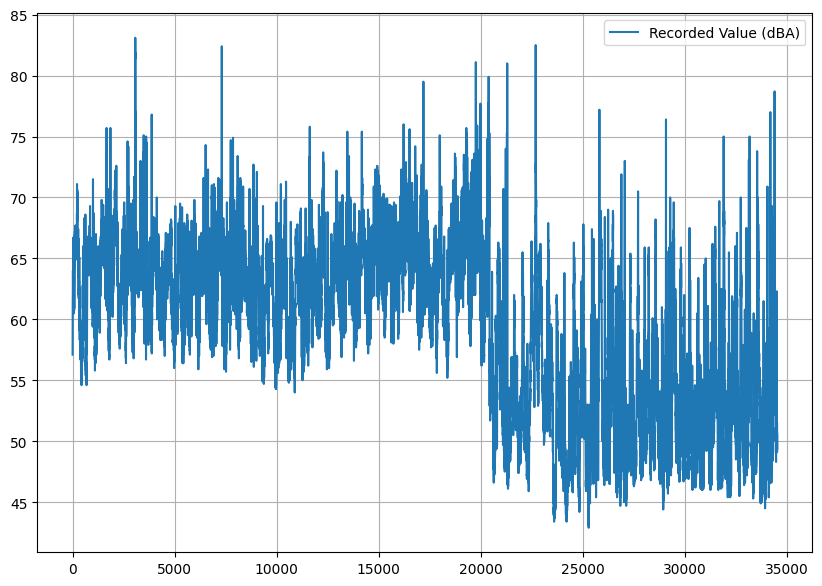

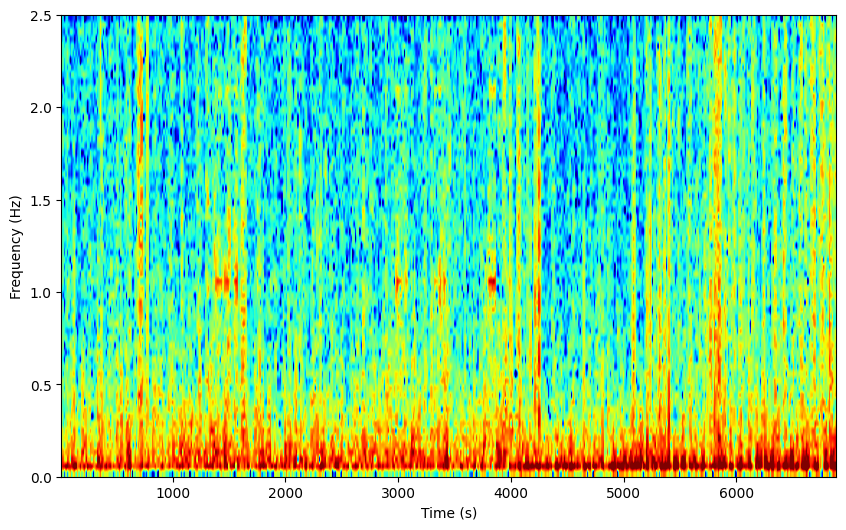

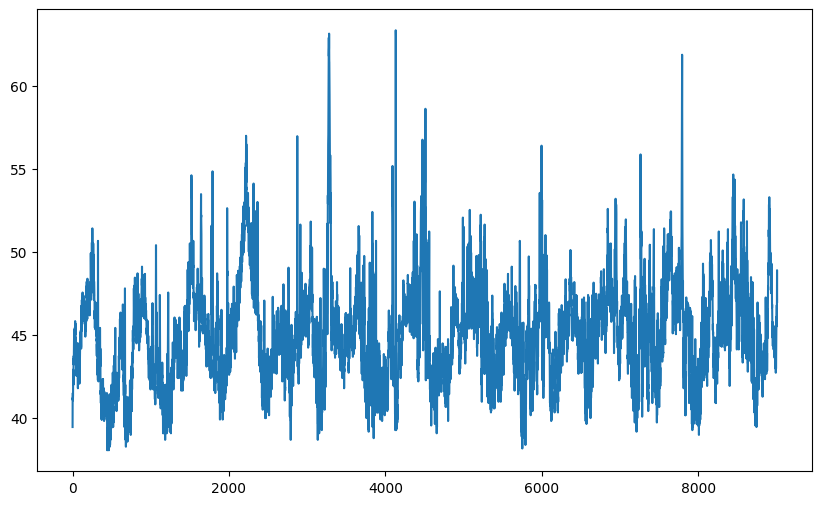

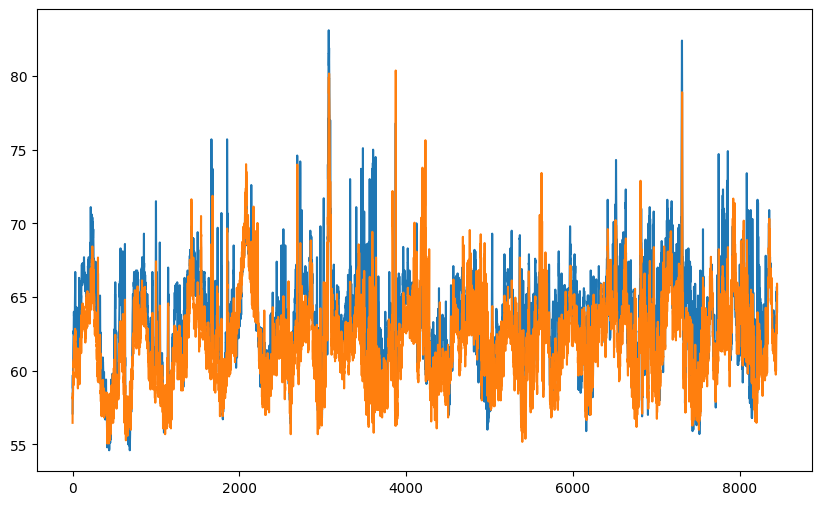

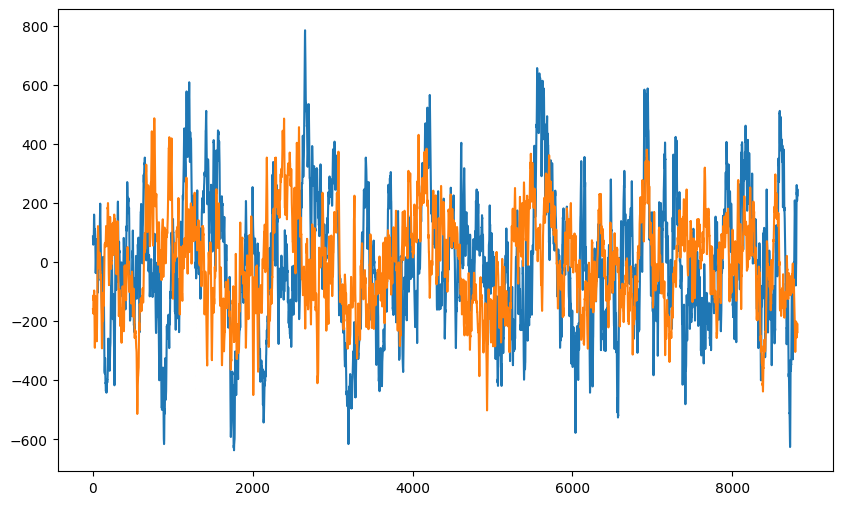

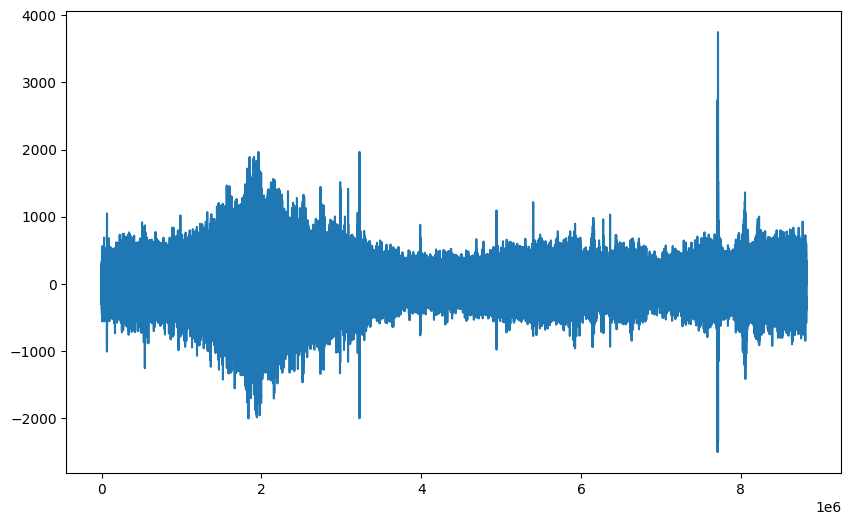

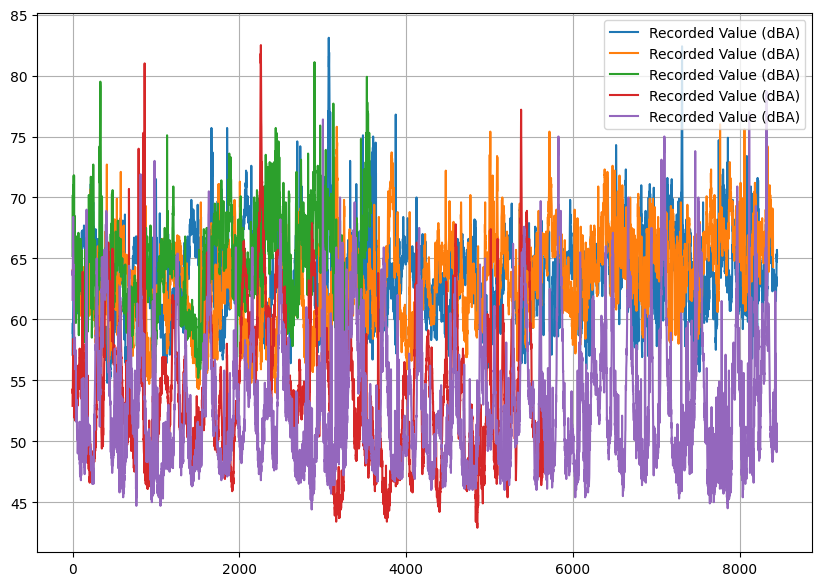

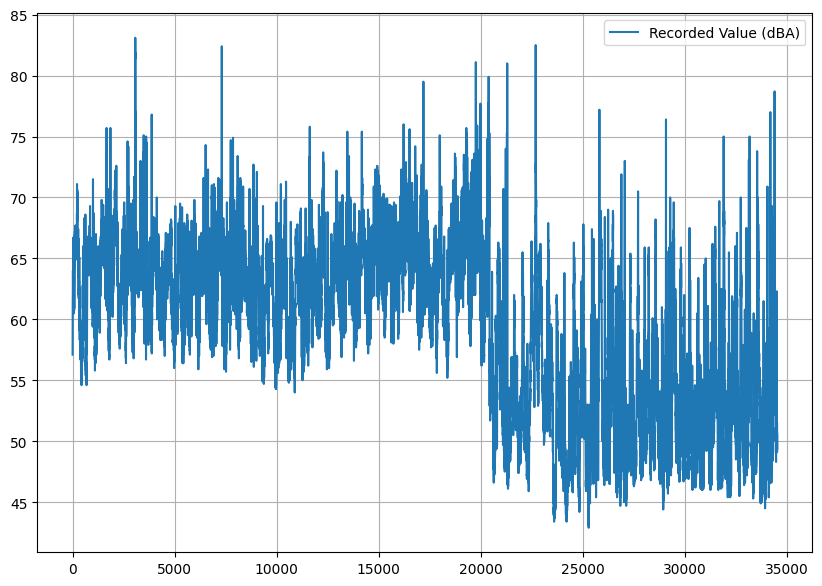

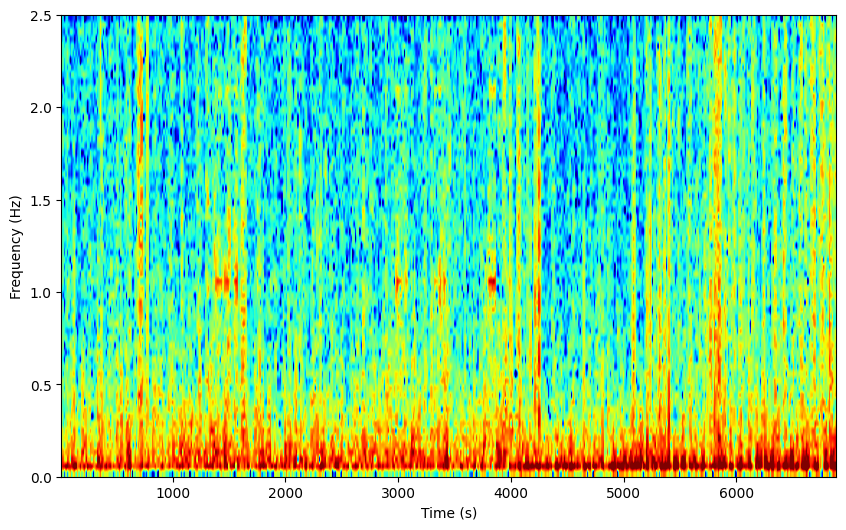

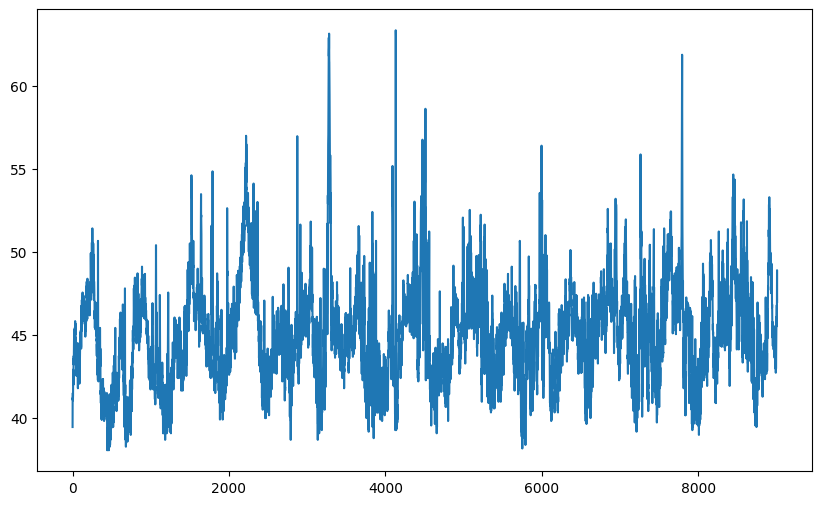

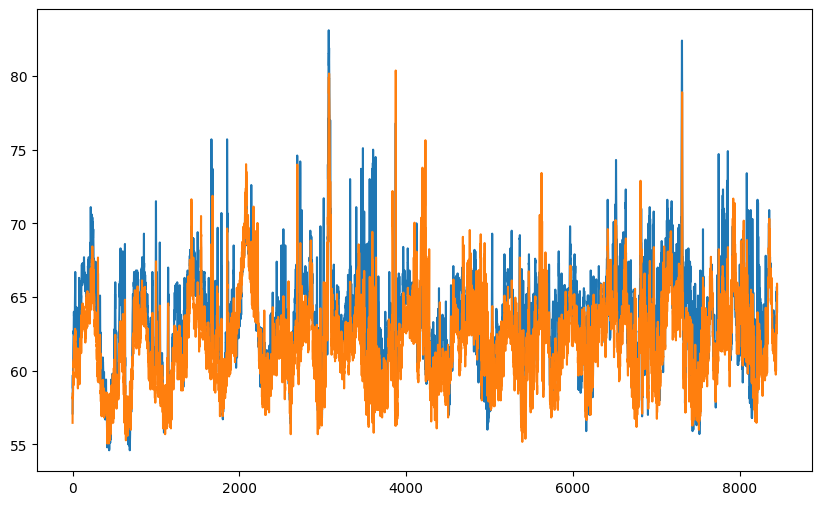

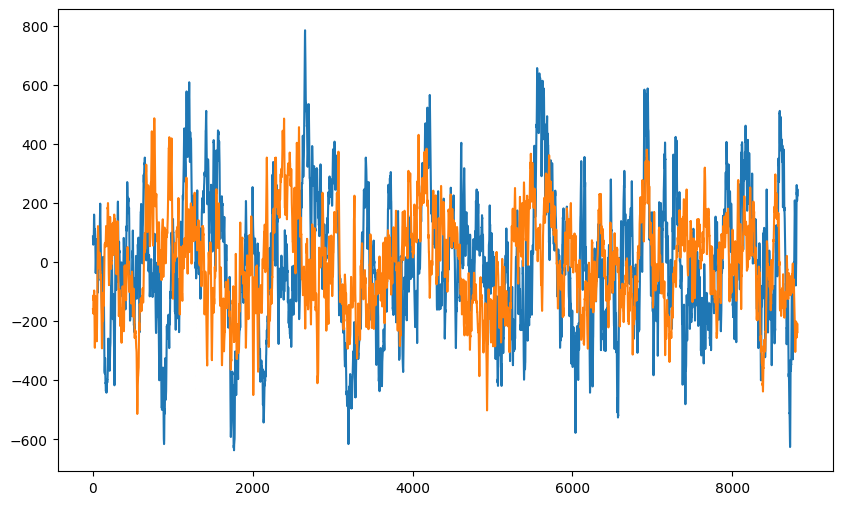

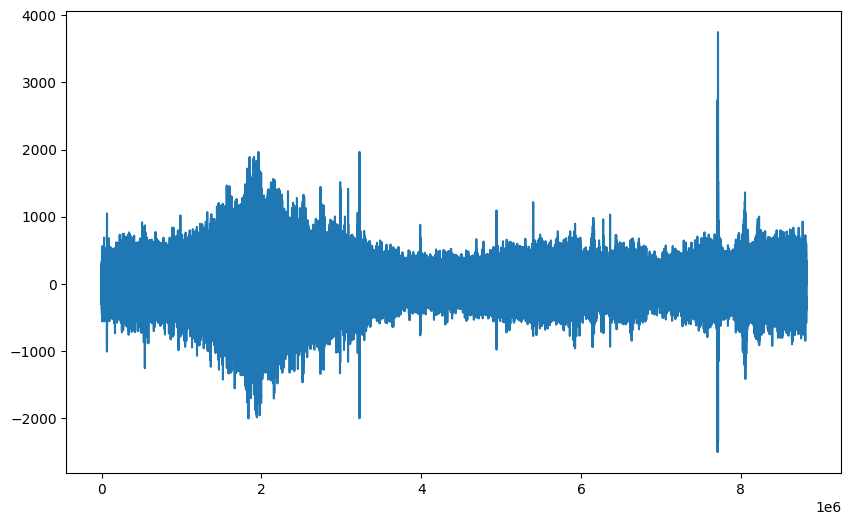

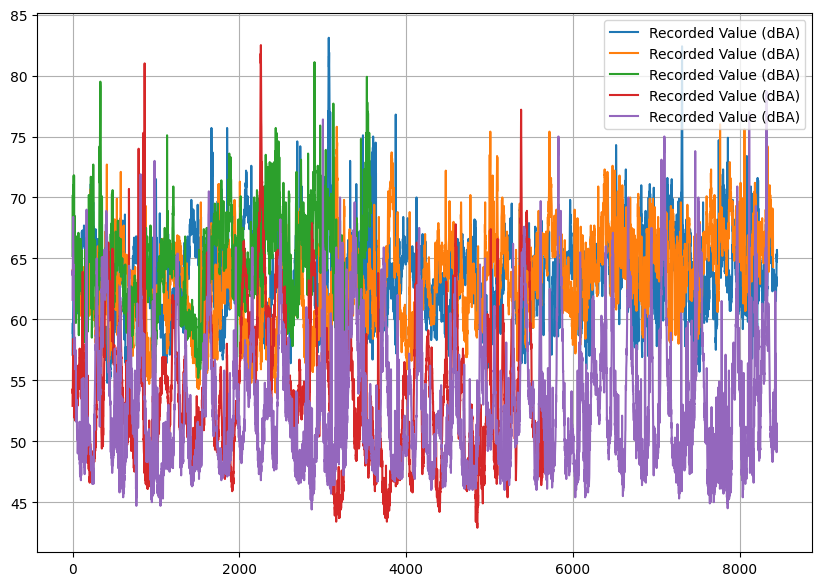

In [49]:
# %matplotlib notebook
# %matplotlib widget
%matplotlib inline
# %matplotlib ipympl
# %matplotlib auto

plt.figure(figsize=[10,7])

for i in range(len(noise_files)):
    noise_df = pd.read_csv(noise_files[i], skiprows=9)
    noise_df.plot(y='Recorded Value (dBA)', ax=plt.gca())
    
plt.grid()
plt.show()

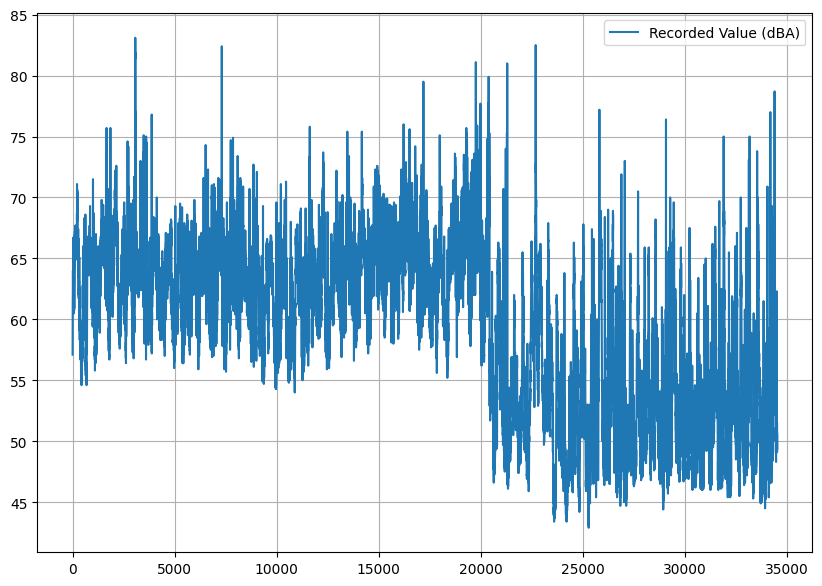

In [50]:
# %matplotlib inline
plt.figure(figsize=[10,7])


noise_df =pd.concat([pd.read_csv(noise_files[i], skiprows=9) for i in range(len(noise_files))], ignore_index=True)
noise_df.plot(y='Recorded Value (dBA)', ax=plt.gca())
    
plt.grid()

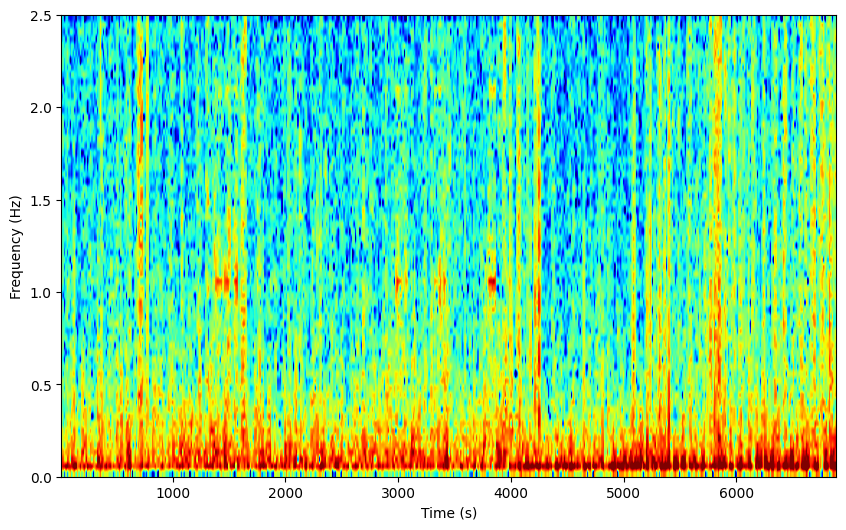

In [51]:
from scipy import signal

trace = noise_df['Recorded Value (dBA)'].values

f1, t1, Spg = signal.spectrogram(trace, 1./0.2, nperseg=128, noverlap=128-64)

plt.figure(figsize=[10,6])
clim = np.log10(Spg).max()/100
plt.imshow(np.log10(Spg), aspect='auto', cmap='jet', vmin=-3, vmax=2, 
           origin='lower', extent=[t1[0], t1[-1], f1[0], f1[-1]])

plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.show()

In [52]:
# noise_data = glob.glob('..\\噪音数据\\2024.1.4_留仙大道噪声测试\\**\\*.m4a', recursive=True)
noise_data = glob.glob('../噪音数据/2024.1.4_留仙大道噪声测试/**/*.m4a', recursive=True)

In [53]:
noise_data

['../噪音数据/2024.1.4_留仙大道噪声测试/测试1/测试1.m4a',
 '../噪音数据/2024.1.4_留仙大道噪声测试/测试2/测试2.m4a',
 '../噪音数据/2024.1.4_留仙大道噪声测试/测试3/测试3.m4a',
 '../噪音数据/2024.1.4_留仙大道噪声测试/测试4/测试4.m4a',
 '../噪音数据/2024.1.4_留仙大道噪声测试/测试5/测试5.m4a']

In [54]:
# !conda install pydub
# !pip install ffmpeg
# !pip install ffprobe



# None of the above work. Should install pydub and ffmpeg from conda

In [55]:
from pydub import AudioSegment
from pydub.utils import mediainfo
 

ifile = 0

print(noise_data[ifile])
audio = AudioSegment.from_file(noise_data[ifile], format='m4a')
au_fs = audio.frame_rate

# info = mediainfo(noise_data[0])
# au_dt = float(info['sample_rate'])



../噪音数据/2024.1.4_留仙大道噪声测试/测试1/测试1.m4a


In [56]:
info = mediainfo(noise_data[ifile])
info

{'index': '0',
 'codec_name': 'aac',
 'codec_long_name': 'AAC (Advanced Audio Coding)',
 'profile': 'LC',
 'codec_type': 'audio',
 'codec_time_base': '1/44100',
 'codec_tag_string': 'mp4a',
 'codec_tag': '0x6134706d',
 'sample_fmt': 'fltp',
 'sample_rate': '44100',
 'channels': '2',
 'channel_layout': 'stereo',
 'bits_per_sample': '0',
 'id': 'N/A',
 'r_frame_rate': '0/0',
 'avg_frame_rate': '0/0',
 'time_base': '1/44100',
 'start_pts': '0',
 'start_time': '0.000000',
 'duration_ts': '79492096',
 'duration': '1802.541859',
 'bit_rate': '102095',
 'max_bit_rate': '128000',
 'bits_per_raw_sample': 'N/A',
 'nb_frames': '77629',
 'nb_read_frames': 'N/A',
 'nb_read_packets': 'N/A',
 'DISPOSITION': {'default': '1',
  'dub': '0',
  'original': '0',
  'comment': '0',
  'lyrics': '0',
  'karaoke': '0',
  'forced': '0',
  'hearing_impaired': '0',
  'visual_impaired': '0',
  'clean_effects': '0',
  'attached_pic': '0',
  'timed_thumbnails': '0'},
 'TAG': {'creation_time': '2024-01-04T06:40:04.000

In [57]:
audio_split = audio.split_to_mono()
audio_arr = np.array([x.get_array_of_samples() for x in audio_split])
audio_arr.shape

(2, 79492096)

In [58]:
info = mediainfo(noise_data[ifile])
info

{'index': '0',
 'codec_name': 'aac',
 'codec_long_name': 'AAC (Advanced Audio Coding)',
 'profile': 'LC',
 'codec_type': 'audio',
 'codec_time_base': '1/44100',
 'codec_tag_string': 'mp4a',
 'codec_tag': '0x6134706d',
 'sample_fmt': 'fltp',
 'sample_rate': '44100',
 'channels': '2',
 'channel_layout': 'stereo',
 'bits_per_sample': '0',
 'id': 'N/A',
 'r_frame_rate': '0/0',
 'avg_frame_rate': '0/0',
 'time_base': '1/44100',
 'start_pts': '0',
 'start_time': '0.000000',
 'duration_ts': '79492096',
 'duration': '1802.541859',
 'bit_rate': '102095',
 'max_bit_rate': '128000',
 'bits_per_raw_sample': 'N/A',
 'nb_frames': '77629',
 'nb_read_frames': 'N/A',
 'nb_read_packets': 'N/A',
 'DISPOSITION': {'default': '1',
  'dub': '0',
  'original': '0',
  'comment': '0',
  'lyrics': '0',
  'karaoke': '0',
  'forced': '0',
  'hearing_impaired': '0',
  'visual_impaired': '0',
  'clean_effects': '0',
  'attached_pic': '0',
  'timed_thumbnails': '0'},
 'TAG': {'creation_time': '2024-01-04T06:40:04.000

In [59]:
import audioop

au_fs_deci = au_fs //5

audio_arr_deci_0 = audio_arr[0, :(audio_arr.shape[1]//au_fs_deci*au_fs_deci)].reshape((-1, au_fs_deci))
#1/5s 算均方根
audio_arr_db = np.array([20*np.log10(audioop.rms(audio_arr_deci_0[i],2)) for i in range(audio_arr_deci_0.shape[0])])

# # audio_arr_deci_1 = audio_arr[1, :audio_arr.shape[1]//au_fs_deci*au_fs_deci].reshape(-1, au_fs_deci).mean(axis=1)

# audio_arr_deci_db = 20*np.log10(abs(audio_arr_deci_0))


# audio_arr_db = 20*np.log10(audioop.rms(audio_arr_deci_0, 1) / 32767)
au_fs,(audio_arr.shape[1]//au_fs_deci*au_fs_deci),audio_arr.shape[1],audio_arr_deci_0.shape[0] * au_fs /5 , audio_arr_db.shape


(44100, 79485840, 79492096, 79485840.0, (9012,))

In [60]:
audio_arr_deci_0.shape

(9012, 8820)

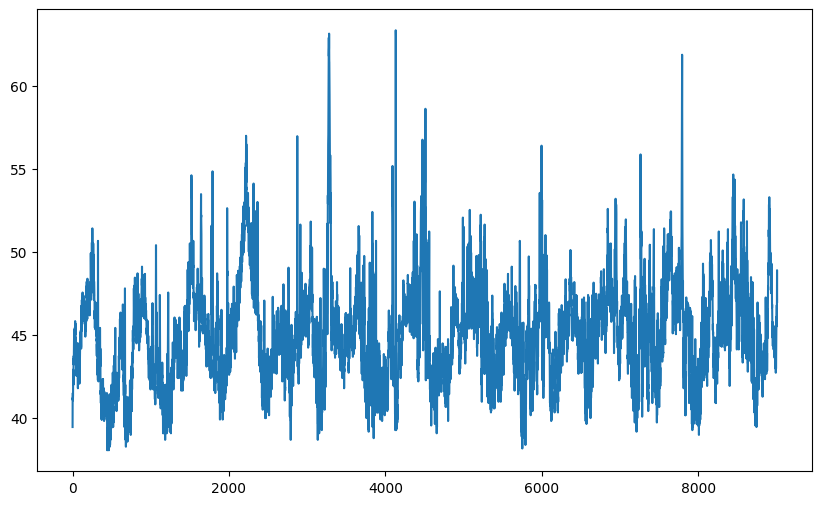

In [61]:
plt.figure(figsize=[10,6])
plt.plot(audio_arr_db)

In [62]:
audio_arr_deci_0[:, 0].shape

(9012,)

In [63]:
audio_arr_deci_0.shape

(9012, 8820)

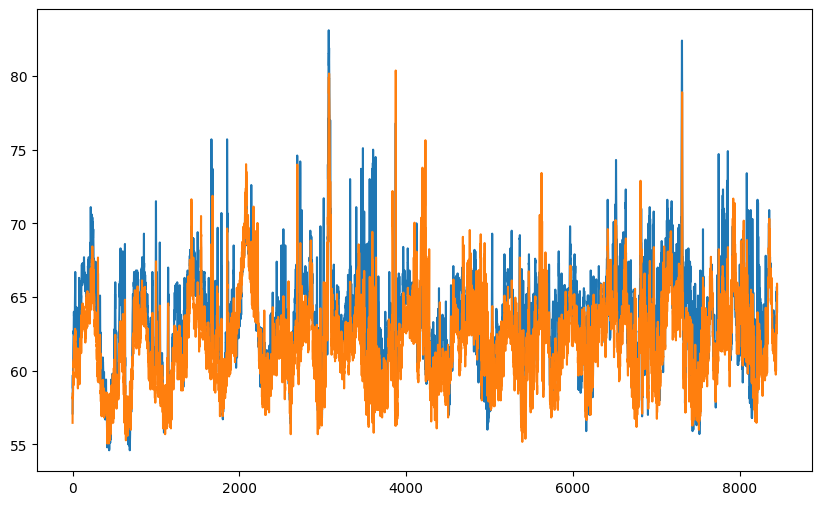

In [64]:
plt.figure(figsize=[10,6])
# plt.plot(audio_arr_deci_0)



noise_df = pd.read_csv(noise_files[ifile], skiprows=9)
noise_db_data = noise_df['Recorded Value (dBA)'].values #blue xls sample
plt.plot(noise_db_data)


plt.plot(np.linspace(0, len(noise_db_data) - 0, len(audio_arr_db)) , audio_arr_db + 17)





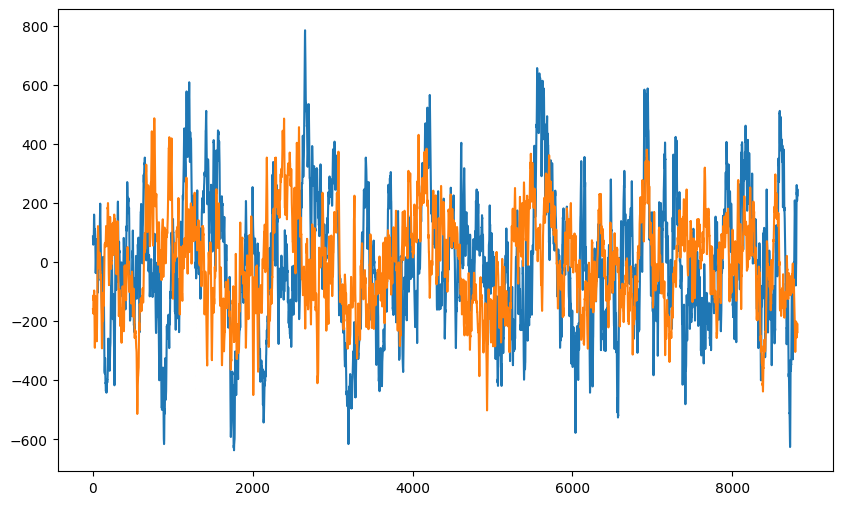

In [65]:
plt.figure(figsize=[10,6])

plt.plot(audio_arr_deci_0[2341,:] )
plt.plot(audio_arr_deci_0[2408,:])

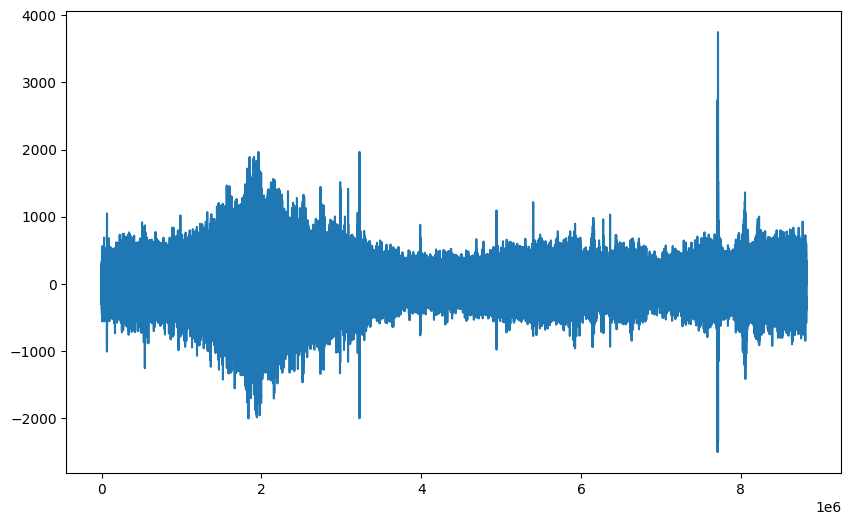

In [66]:
plt.figure(figsize=[10,6])

# plt.plot(np.concatenate([audio_arr_deci_0[i,:] for i in range(2341, 2535)]))

plt.plot(np.concatenate([audio_arr_deci_0[i,:] for i in range(2000, 3000)]))

# plt.plot(audio_arr_deci_0[2408,:])

In [67]:
1.2e6 / 44100

27.210884353741495

In [68]:
2341 * au_fs_deci / au_fs / 60

7.803333333333333

In [69]:
np.where(abs(np.linspace(0, len(noise_db_data) - 0, len(audio_arr_db)) - 2377) < 0.5)

(array([2535]),)